This is a [jupyter notebook](http://jupyter.org). Code is organized into cells, which can be of two main types: containing [Markdown text](https://help.github.com/articles/basic-writing-and-formatting-syntax) (including LaTeX formulas) or [Python](http://www.diveintopython3.net/) code. Each cell can be interactively evaluated by selecting it and pressing `Shift + Enter`, similar to a `Mathematica` notebook.

# Statement of the problem

### Original email from Madalin

I tried to reproduce the exclusion plot from Kensuke's
paper by plugging in the lasers parameters from [Search for sub-eV scalar and pseudoscalar resonances via four-wave mixing with a laser collider](https://doi.org/10.1093/ptep/ptv101),
with the aim of then repeating the same thing for the E4 laser
parameters. I got stuck at estimating the number of photons expected.

I feel the need of being able to understand the four wave mixing process (to be
tested at E4) locally, in our theory group and make estimations for signal
expectations and detection optimization.  

A first step would be to reproduce numerically the results from the paper
and then dive into the theory.

### Import needed libraries

For linear algebra, use `numpy`. See [NumPy tutorial](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html) and [NumPy for Matlab users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html). 

In [111]:
import numpy as np

For plotting, use `matplotlib`. See [matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html).

In [11]:
import matplotlib.pyplot as plt

Import used functions and constants from the `math` library.

In [66]:
from math import pi, atan, sqrt

##  The Estimation w.r.t. the Coupling of Dark Matter Candidates

Goal: To understand Eq.(8) + Fig.10 & Fig.11 in [Search for sub-eV scalar and pseudoscalar resonances via four-wave mixing with a laser collider](https://doi.org/10.1093/ptep/ptv101). 

In [14]:
# Physical parameters
hbar_J = 1.054571800 * 10**(-34)      # Planck's constant/(2*pi) (J*sec)
hbar_eV = 6.582119514 * 10**(-16)     # Planck's constant/(2*pi) (eV*sec)
c = 299792458                      # Speed of light (m/sec)

Note Python uses `**` instead of `^` for power operator. Also, there are no `;` at the end of lines and comments start with `#`.

In [16]:
# From Table 2
lambda_c = 800 * 10**(-9)      # Center of wavelength of creation laser Éc (m)
lambda_i = 1064 * 10**(-9)     # Center of wavelength of inducing laser Éi (m)
D_c = 7.5 * 10**(-3)           # Relative line width of creation laser (ÂÖ/ Ö)
D_i = 1.0 * 10**(-4)           # Relative line width of inducing laser
tau_c = 900 * 10**(-15)        # Duration time of creation laser pulse per injection Ñc (sec)
tau_i = 9 * 10**(-9)           # Duration time of inducing laser pulse per injection Ñi (sec)
E_c = 9.3 * 10**(-6)           # Creation laser energy per Ñc (J)
E_i = 100 * 10**(-6)           # Inducing laser energy per Ñi (J)
f = 200 * 10**(-3)             # Focal length f (m)
d = 20 * 10**(-3)              # Beam diameter of laser beams d (m)
# Upper mass range given by Æ < Æ
u = 0.75            # u = Ö4/Ö
G_sc11 = 19/32      # Incident plane rotation factor Gsc
G_ps12 = 1/2        # Incident plane rotation factor Gps
F_sc1122 = 19.4     # Axially asymmetric factor Fs sc
F_ps1212 = 19.2     # Axially asymmetric factor Fs ps
C_mb = 1/2          # Combinatorial factor in luminosity Cmb
Ep_D = 1.4          # Single-photon detection efficiency  D
Ep_opt1 = 0.5       # Efficiency of optical path from interaction point to Path{1} opt1
Ep_opt2 = 0.9       # Efficiency of optical path from interaction point to Path{2}  opt2
dN_S1 = 2.2         # ÂNS1
dN_S2 = 4.4         # ÂNS2

Some characters in the comments might note be visible due to missing Japanese fonts.

In [18]:
# From Table 1
W_S = 46120         # Number of events

In [19]:
# From Eq.(15)
Y_sc = (2.24 * dN_S2) / (Ep_opt2 * Ep_D * W_S)
Y_ps = (2.24 * dN_S1) / (Ep_opt1 * Ep_D * W_S)

In [22]:
# no. of photons in Lasers
N_c = E_c / ( 2 * pi* hbar_J * c / lambda_c )
N_i = E_i / ( 2 * pi* hbar_J * c / lambda_i )

In [33]:
# Eq.(8)
f1 = lambda_c / (c * tau_c)
f2 = tau_c / tau_i
f3 = (f / d)**3
f4 = atan( pi * d**2 / (4 * f * lambda_c ) )

Definitions from [Sensitivity to dark energy candidates by searching for four-wave mixing of high-intensity lasers in the vacuum](https://doi.org/10.1093/ptep/pts073).

In [34]:
u_up = u * (1 + D_i)
u_down = u * (1 - D_i)

In [35]:
f5 = (u_up-u_down)**2 / (u_up * u_down)

In [36]:
W = pi/2
Omega = 2 * pi* hbar_eV * c/lambda_c

In [81]:
x_max = 1000
m = np.linspace(start=0.15/x_max, stop=0.15, num=x_max, endpoint=True)

Return evenly spaced numbers over a specified interval. See `np.linspace?` for help.

In [63]:
# Scalar field
G_over_M_sc = Y_sc * Omega**3 / ( f1 * f2 * f3 * f4 * f5 * W * G_sc11 * F_sc1122 * C_mb * N_c**2 * N_i )
G_over_M_sc = 2**(1/4) * 8 * pi**2 * sqrt( G_over_M_sc )
G_over_M_sc = G_over_M_sc * m**(-5/2)

Operations like `m**(-5/2)` are automatically applied to every element of the array `m`.

In [78]:
# Pseudo-scalar field
G_over_M_ps = Y_ps * Omega**3 / ( f1 * f2 * f3 * f4 * f5 * W * G_ps12 * F_ps1212 * C_mb * N_c**2 * N_i )
G_over_M_ps = 2**(1/4) * 8 * pi**2 * sqrt( G_over_M_ps )
G_over_M_ps = G_over_M_ps * m**(-5/2)

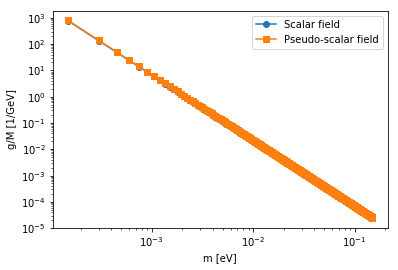

In [109]:
# Figure ploting part
plt.loglog(m, 10**9*G_over_M_sc,'-o', label='Scalar field')
plt.loglog(m, 10**9*G_over_M_ps,'-s', label='Pseudo-scalar field')
plt.xlabel('m [eV]')
plt.ylabel('g/M [1/GeV]')
plt.legend();

`a[-1]` returns the last element of some array `a`. Below we also use `Python`'s [string formatting](https://pyformat.info/) capabilities.  

In [106]:
print('g/M = {} 1/GeV at m = {} eV for the scalar field.'.format(10**9*G_over_M_sc[-1], m[-1]))
print('g/M = {} 1/GeV at m = {} eV for the pseudo-scalar field.'.format(10**9*G_over_M_ps[-1], m[-1]))

g/M = 2.406272707503095e-05 1/GeV at m = 0.15 eV for the scalar field.
g/M = 2.5005362779402515e-05 1/GeV at m = 0.15 eV for the pseudo-scalar field.


This is factor-2 different between the Kensuke's result, he might have implemented some secret correction.

$$ \frac{g}{M} = 2.4 \times 10^{-4} \, \text{GeV}^{-1} \quad \text{at} \quad m = 0.15 \, \text{eV} $$
Kensuke's suggestion:
$$ \frac{g}{M} = 5.42 \times 10^{-4} \, \text{GeV}^{-1} $$ 

for reference, here is

# Keita's MATLAB code

In [104]:
from IPython.display import HTML
HTML(filename='keita/matlab.html')

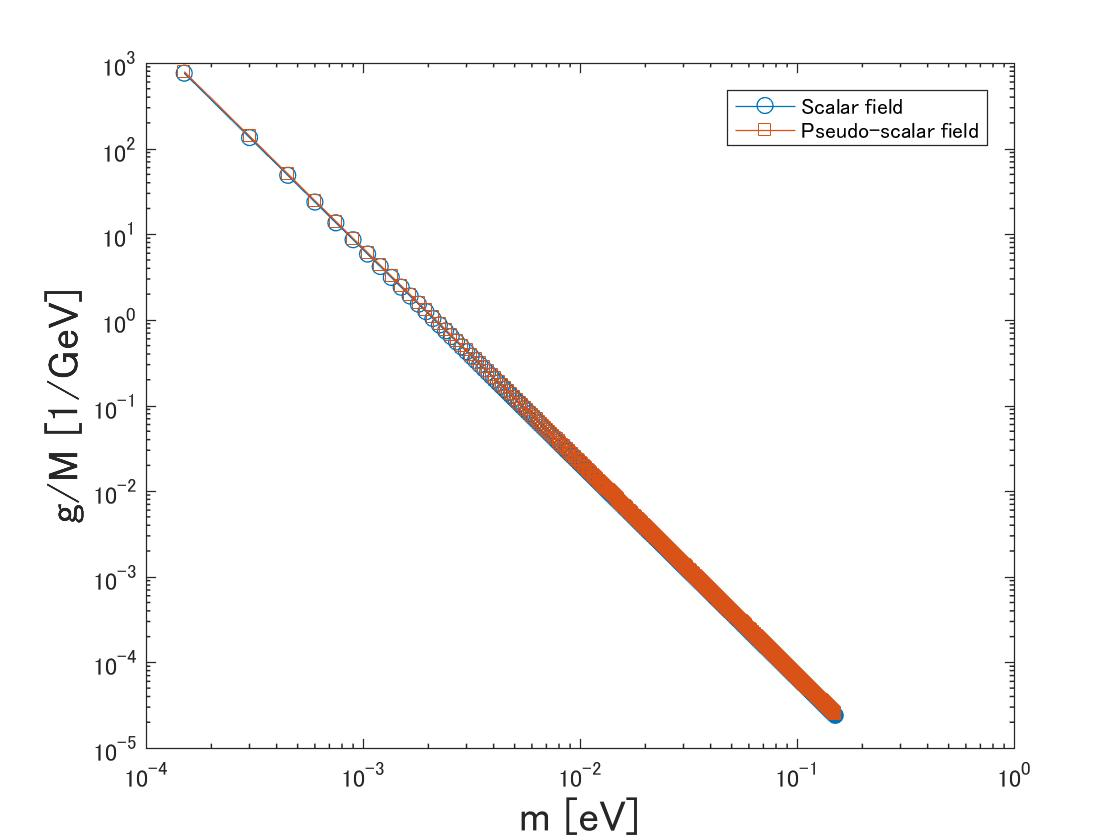

In [105]:
# MATLAB figure 
from IPython.display import Image
Image(filename='keita/GoverM.jpg', width=400, height=400)